###  RQ4: How did the situation compare with the rest of Europe?

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import pearsonr

In [10]:
# Load the dataset of electricity consumption
Europe_energy_consumption= pd.read_csv('Final energy consumption by sector.csv')
Europe_energy_consumption.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE
0,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2011,1953.468
1,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2012,1790.623
2,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2013,1961.871
3,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2014,2058.574
4,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2015,1962.498


In [11]:
# First, convert the 'TIME_PERIOD' column to datetime
Europe_energy_consumption['TIME_PERIOD'] = pd.to_datetime(Europe_energy_consumption['TIME_PERIOD'], format='%Y').dt.year

# Sort the DataFrame by the 'TIME_PERIOD' column
Europe_energy_consumption = Europe_energy_consumption.sort_values(by='TIME_PERIOD')

In [12]:
Europe_energy_consumption.head()

,DATAFLOW,LAST UPDATE,freq,nrg_bal,siec,unit,geo,TIME_PERIOD,OBS_VALUE
0,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,AL,2011,1953.468
438,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,TR,2011,76076.088
57,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,CY,2011,1614.212
426,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,SK,2011,10402.286
69,ESTAT:TEN00124(1.0),24/05/2024 23:00,A,FC_E,TOTAL,KTOE,CZ,2011,23337.059


In [13]:
Europe_energy_consumption.isnull().sum()

DATAFLOW       0
LAST UPDATE    0
freq           0
nrg_bal        0
siec           0
unit           0
geo            0
TIME_PERIOD    0
OBS_VALUE      0
dtype: int64

In [14]:
Europe_energy_consumption.describe()

,TIME_PERIOD,OBS_VALUE
count,481.000000,481.000000
mean,2016.488565,52885.883405
std,3.417537,146097.766784
min,2011.000000,388.461000
25%,2014.000000,3697.443000
50%,2016.000000,13611.792000
75%,2019.000000,33058.280000
max,2022.000000,942928.329000


In [15]:
# Calculate the average value for each year
average_by_year = Europe_energy_consumption.groupby('TIME_PERIOD')['OBS_VALUE'].mean().reset_index()

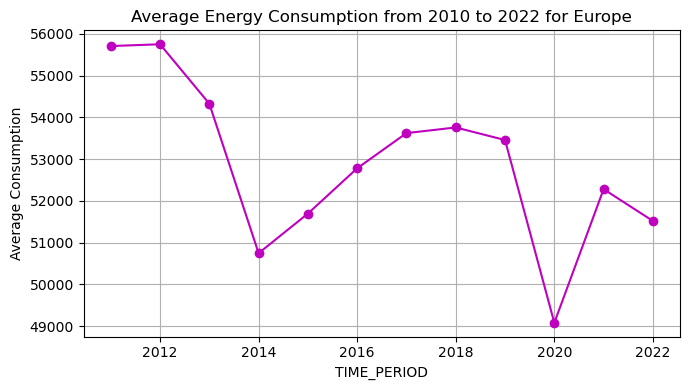

In [16]:
# Plotting
plt.figure(figsize=(7,4))
plt.plot(average_by_year['TIME_PERIOD'], average_by_year['OBS_VALUE'], marker='o', color='m', linestyle='-')
plt.title('Average Energy Consumption from 2010 to 2022 for Europe')
plt.xlabel('TIME_PERIOD')
plt.ylabel('Average Consumption')
plt.grid(True)
plt.tight_layout()
plt.show()

In [17]:
# Load the Excel file of Ireland final energy consumption
file_path = r"C:\Users\grace\Desktop\Dissertation\data\seas\Final-Energy-Consumption.xlsx"
excel_data = pd.ExcelFile(file_path)

# Load the first sheet into a DataFrame
df_first_sheet = excel_data.parse(sheet_name=excel_data.sheet_names[0])

# Extract the last row of the DataFrame
last_row = df_first_sheet.tail(1)

# Convert all column names to strings
last_row.columns = last_row.columns.map(str)

# Print the columns to understand their structure
print("Columns in the last row:", last_row.columns)

Columns in the last row: Index(['TFC', 'Unnamed: 1', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype='object')


In [18]:
# Filter the columns to include only the years from 2010 to 2022
years_of_interest = [str(year) for year in range(2010, 2022 + 1)]
filtered_data = last_row[[col for col in last_row.columns if col.strip() in years_of_interest]]

# Create a new DataFrame with years as a column
new_df = pd.DataFrame({
    'Year': filtered_data.columns,
    'Total Energy Consumption': filtered_data.values[0]
})

# Display the new DataFrame
new_df.head()

,Year,Total Energy Consumption
0,2010,11884.374798
1,2011,11084.673482
2,2012,10727.657151
3,2013,10908.688609
4,2014,10873.258243


In [30]:
# Convert 'Year' column to integer
new_df['Year'] = new_df['Year'].astype(int)

# Filter the data to include only the years 2011 to 2022
europe_df_filtered = average_by_year[(average_by_year['TIME_PERIOD'] >= 2011) & (average_by_year['TIME_PERIOD'] <= 2022)]
ireland_df_filtered = new_df[(new_df['Year'] >= 2011) & (new_df['Year'] <= 2022)]

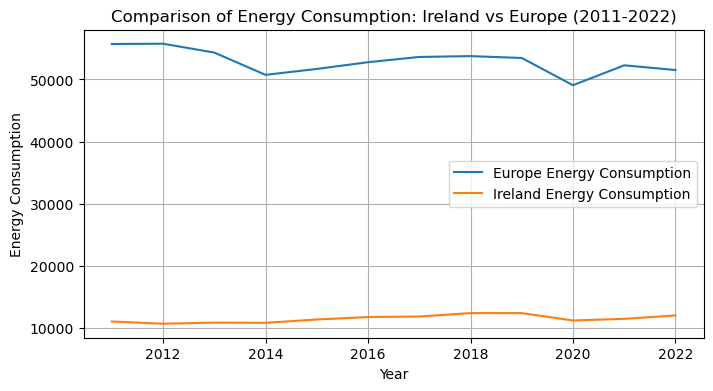

In [31]:
# Aggregate data by year
europe_agg = europe_df_filtered.groupby('TIME_PERIOD')['OBS_VALUE'].sum().reset_index()
ireland_agg = ireland_df_filtered.groupby('Year')['Total Energy Consumption'].sum().reset_index()

# Renaming columns for clarity
europe_agg.rename(columns={'OBS_VALUE': 'Europe Consumption', 'TIME_PERIOD': 'Year'}, inplace=True)
ireland_agg.rename(columns={'Total Energy Consumption': 'Ireland Consumption'}, inplace=True)

# Merge the data frames on the 'Year' column
comparison_df = pd.merge(europe_agg, ireland_agg, on='Year')

# Plot the data
plt.figure(figsize=(8, 4))
plt.plot(comparison_df['Year'], comparison_df['Europe Consumption'], label='Europe Energy Consumption')
plt.plot(comparison_df['Year'], comparison_df['Ireland Consumption'], label='Ireland Energy Consumption')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Comparison of Energy Consumption: Ireland vs Europe (2011-2022)')
plt.legend()
plt.grid(True)
plt.show()

In [32]:
# Calculate the Pearson correlation coefficient
corr_coefficient, p_value = pearsonr(comparison_df['Europe Consumption'], comparison_df['Ireland Consumption'])

print(f"Pearson correlation coefficient: {corr_coefficient}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a significant correlation between Ireland's and Europe's energy consumption.")
else:
    print("There is no significant correlation between Ireland's and Europe's energy consumption.")

Pearson correlation coefficient: -0.07826724598719766
P-value: 0.8089537351891013
There is no significant correlation between Ireland's and Europe's energy consumption.
